#### <font color = orange><b>[IMEN321] 데이터마이닝 Team project / 2022-1학기</b></font>
<b>텍스트 마이닝 기법을 활용한 Mercari 상품 데이터 분석/예측</b><br>
<a href = "https://www.kaggle.com/c/mercari-price-suggestion-challenge">Link to kaggle</a>

<img src="https://miro.medium.com/max/1400/0*y_W6nAQZkx-F5ICQ" width="500" height=500><br>


<u2pl>
    <li>Mercari is an e-commerce company currently operational in the US and Japan.</li><br>
    <li>Mercari is a platform where people sell their products which are mostly used products so    when a seller wants to sell his product on the website he/she would not always be sure as to how much the product should be sold for.</li><br>
    <li>If the price suggested is too low then the seller might lose interest in selling the product on the platform and if the price suggested is too high then it will be difficult to find a buyer for it.</li><br>
    <li>Mercari wants to suggest appropriate price to the seller for his product. </li>
    </ul>
 
<br>
<b>“상품의 가격은 상품명, 상품 상세 설명, 상품의 상태 등의 정형/비정형 데이터로 설명될 수 있다. 이를 중요한 변수로 활용해 합리적인 가격 예측 결과를 도출할 수 있는가?”</b>


In [13]:
import pandas as pd

# load tsv file/ input your tsv dir
mercari_df= pd.read_csv('C:/Users/user/Desktop/living/school/전공/데이터마이닝/팀프로젝트/mercari_train.tsv',
                        sep='\t')

print(mercari_df.shape)
mercari_df.head(10)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


<b> 해당 데이터셋은 1,482,535개의 행과 8개의 열로 구성되어 있다. 각 피처에 관한 정보는 다음과 같다.</b><br><br>

* train_id : 데이터 id
* name : 제품명
* item_condition_id : 판매자가 제공하는 제품 상태
* category_name : 카테고리 명
* brand_name : 브랜드 이름
* price : 제품 가격. 예측을 위한 타깃 속성
* shipping : 배송비 무료 여부. 1이면 무료(판매자가 지불), 0이면 유료(구매자 지불)
* item_description : 제품에 대한 설명

**데이터 살펴보기**

In [14]:
print(mercari_df.info())
print(mercari_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None
           train_id  item_condition_id         price      shipping
count  1.482535e+06       1.482535e+06  1.482535e+06  1.482535e+06
mean   7.412670e+05       1.907380e+00  2.673752e+01  4.472744e-01
std    4.279711e+05       9.031586e-01  3.858607e+01  4.972124e-01
min    0.000000e+00       1.000000e+00  0.000000e+00

**결측치 확인**
* category_name, brand_name 그리고 item_description 피처에 결측치가 있다는 것을 알 수 있다. 
* Brand_name column에 결측치가 가장 많고 전체 데이터 수의 42.68%나 되기에 target variable 예측이 어렵다

In [16]:
total_rows = mercari_df.shape[0]
null_values = mercari_df.isnull().sum(axis=0)
print(null_values)
print("brand_name 결측치 : ", round(null_values['brand_name']/total_rows*100,2),'%')
print("category_name 결측치 : ", round(null_values['category_name']/total_rows*100,2),'%')
print("item_description 결측치 : ", round(null_values['item_description']/total_rows*100,4),'%')

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64
brand_name 결측치 :  42.68 %
category_name 결측치 :  0.43 %
item_description 결측치 :  0.0003 %


**log 변환 시 문제되는 이상치 제거**

In [6]:
mercari_df = mercari_df[mercari_df['price']>=5]  # Removing the prodicts with prices less than 5
mercari_df = mercari_df[mercari_df['price']<=2000]  # Removing the prodicts with prices more than 2000
mercari_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3.0,Men/Tops/T-shirts,NaN,10.0,1.0,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3.0,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0.0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1.0,Women/Tops & Blouses/Blouse,Target,10.0,1.0,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1.0,Home/Home Décor/Home Décor Accents,NaN,35.0,1.0,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1.0,Women/Jewelry/Necklaces,NaN,44.0,0.0,Complete with certificate of authenticity


In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import gc

import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm.notebook import tqdm
tqdm.pandas()

from sklearn.metrics import mean_squared_log_error
import pickle
import regex as re

from sklearn.model_selection import train_test_split
import scipy
from scipy.sparse import hstack

from scipy import stats

mercari_df['log_prices']= np.log(mercari_df['price'].values)

**각 피처들의 유형 살펴보기**

**- item_condition_id**

Condition 1 = 41.62 %
Condition 2 = 24.97 %
Condition 3 = 28.72 %
Condition 4 = 2.09 %
Condition 5 = 0.15 %


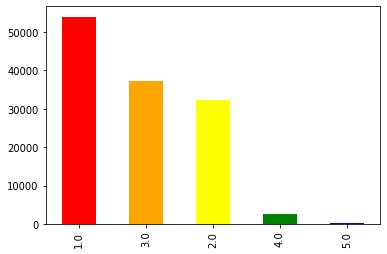

In [8]:
categories_counts = mercari_df['item_condition_id'].value_counts()
print("Condition 1 =", round(categories_counts[1]/total_rows*100,2),'%')
print("Condition 2 =", round(categories_counts[2]/total_rows*100,2),'%')
print("Condition 3 =", round(categories_counts[3]/total_rows*100,2),'%')
print("Condition 4 =", round(categories_counts[4]/total_rows*100,2),'%')
print("Condition 5 =", round(categories_counts[5]/total_rows*100,2),'%')

mercari_df['item_condition_id'].value_counts().plot.bar(color=['red','orange','yellow','green','blue'])

**- shipping**

In [9]:
print('Shipping 값 유형:\n',mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mercari_df['item_condition_id'].value_counts())


Shipping 값 유형:
 0.0    71573
1.0    54953
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1.0    53983
3.0    37247
2.0    32383
4.0     2713
5.0      200
Name: item_condition_id, dtype: int64


Shipping 0 = 55.18 %
Shipping 1 = 42.37 %


Text(0, 0.5, 'Number of products')

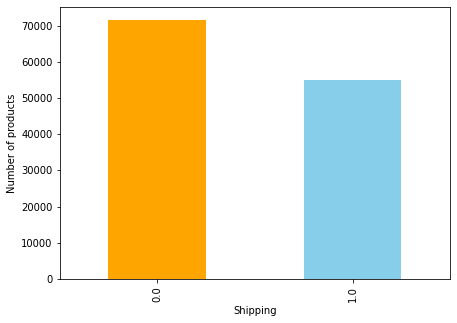

In [10]:
shipping_counts = mercari_df['shipping'].value_counts()
print("Shipping 0 =", round(shipping_counts[0]/total_rows*100,2),'%')
print("Shipping 1 =", round(shipping_counts[1]/total_rows*100,2),'%')
ax = mercari_df['shipping'].value_counts().plot.bar(color=['orange','skyblue'], figsize=(7,5))
ax.set_xlabel("Shipping")
ax.set_ylabel("Number of products")

**- shipping에 따른 log_prices의 분포**

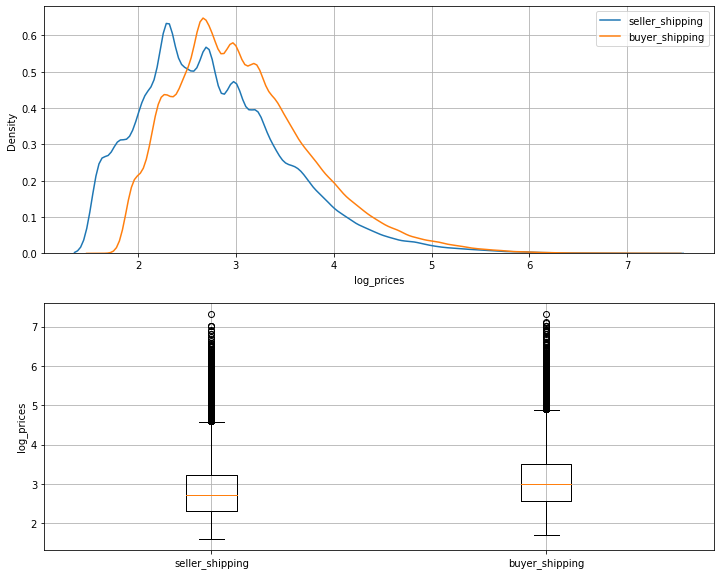

Lowest log_prices of buyer_shipping :  1.705
Lowest log_prices of seller_shipping :  1.609


In [11]:
seller_shipping = mercari_df[mercari_df['shipping']==1]['log_prices']
#seller_shipping = seller_shipping[seller_shipping<150]
buyer_shipping = mercari_df[mercari_df['shipping']==0]['log_prices']
#buyer_shipping = buyer_shipping[buyer_shipping<150]
plt.figure(figsize=(12,10))
plt.subplot(211)
ax = sns.distplot(seller_shipping, hist=False, label="seller_shipping")
ax = sns.distplot(buyer_shipping, hist=False, label="buyer_shipping")
h,l = ax.get_legend_handles_labels()
ax.legend(h, l)
plt.grid()

plt.subplot(212)
plt.boxplot([seller_shipping, buyer_shipping])
plt.xticks([1,2],('seller_shipping','buyer_shipping'))
plt.ylabel('log_prices')
plt.grid()
plt.show()
print("Lowest log_prices of buyer_shipping : ",round(buyer_shipping.min(),3))
print("Lowest log_prices of seller_shipping : ",round(seller_shipping.min(),3))

**- item_description**

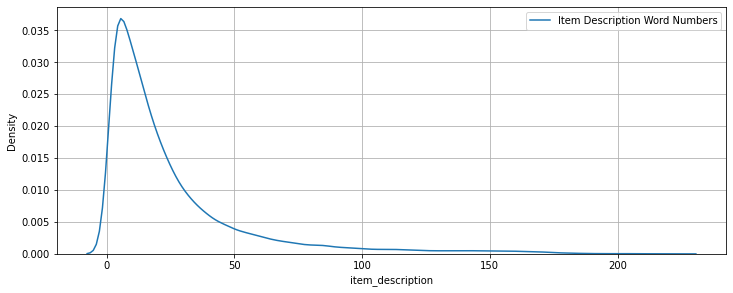

In [12]:
#from matplotlib import font_manager, rc
#font_path = 'C:/Windows/Fonts./malgun.ttf'
#font_name = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font_name)

word_counts = mercari_df['item_description'].str.split().str.len()
plt.figure(figsize=(12,10))
plt.subplot(211)
ax = sns.distplot(word_counts, hist=False, label="Item Description Word Numbers")
h,l = ax.get_legend_handles_labels()
ax.legend(h, l)
plt.grid()
plt.show()

In [13]:
boolean_cond= mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()
print("item_description 각 문자열의 평균 단어 개수 : ", word_counts.mean())

item_description 각 문자열의 평균 단어 개수 :  25.616758610878396


**- brand_name**

brand_name의 고유값 수 :  2272


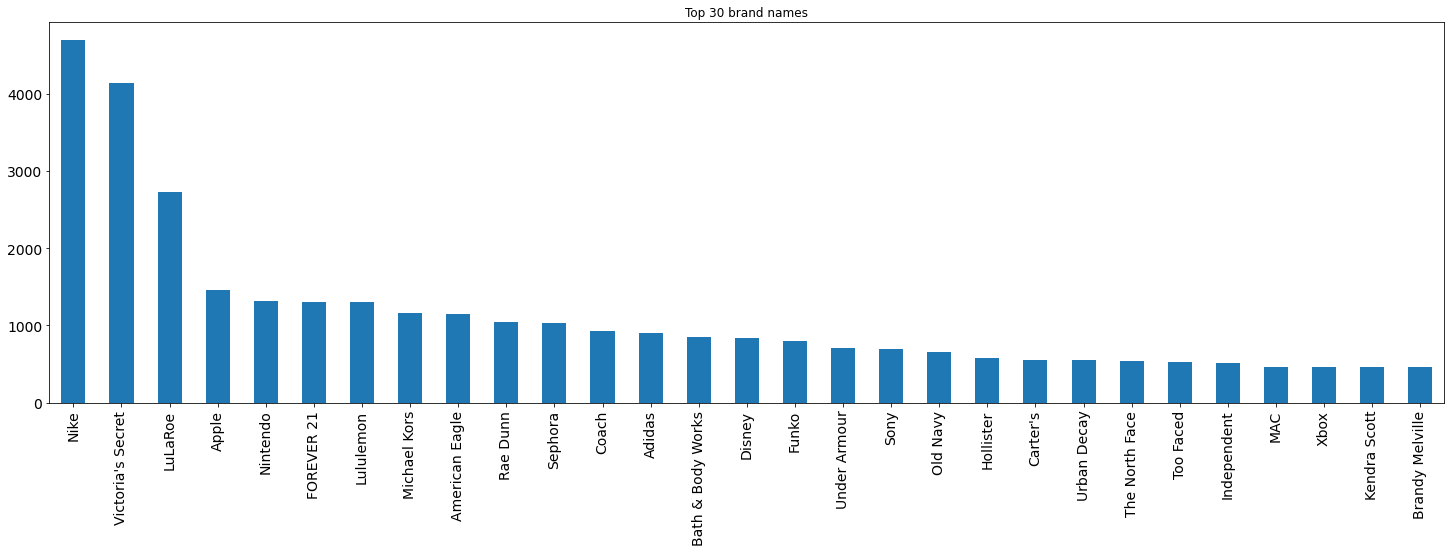

In [14]:
print("brand_name의 고유값 수 : ",len(list(mercari_df['brand_name'].unique())))
mercari_df['brand_name'].value_counts()[1:30].plot(kind='bar', figsize=(25,7), title="Top 30 brand names", fontsize=14)

**- category_name**


In [15]:
def split_cat(text):
    """
    This function separated the categories into its three parts. Main category, sub-category 1 and sub-category 2
    """
    try: 
        return text.split("/")
    except: 
        return ("No Label", "No Label", "No Label")

mercari_df['cat_general'], mercari_df['cat_sub1'], mercari_df['cat_sub2'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))
mercari_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_prices,cat_general,cat_sub1,cat_sub2
0,0,MLB Cincinnati Reds T Shirt Size XL,3.0,Men/Tops/T-shirts,NaN,10.0,1.0,No description yet,2.302585,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3.0,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0.0,This keyboard is in great condition and works ...,3.951244,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1.0,Women/Tops & Blouses/Blouse,Target,10.0,1.0,Adorable top with a hint of lace and a key hol...,2.302585,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1.0,Home/Home Décor/Home Décor Accents,NaN,35.0,1.0,New with tags. Leather horses. Retail for [rm]...,3.555348,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1.0,Women/Jewelry/Necklaces,NaN,44.0,0.0,Complete with certificate of authenticity,3.784190,Women,Jewelry,Necklaces


In [16]:
print("대분류의 고유값 수: ",mercari_df['cat_general'].nunique())
print("중분류의 고유값 수: ",mercari_df['cat_sub1'].nunique())
print("소분류의 고유값 수: ",mercari_df['cat_sub2'].nunique())

대분류의 고유값 수:  11
중분류의 고유값 수:  112
소분류의 고유값 수:  719


**대분류**

In [17]:
mercari_df['cat_general'].value_counts()

Women                     57448
Beauty                    17718
Kids                      14635
Electronics               10353
Men                        8135
Home                       5799
Vintage & Collectibles     3766
Other                      3741
Handmade                   2285
Sports & Outdoors          2140
No Label                    506
Name: cat_general, dtype: int64

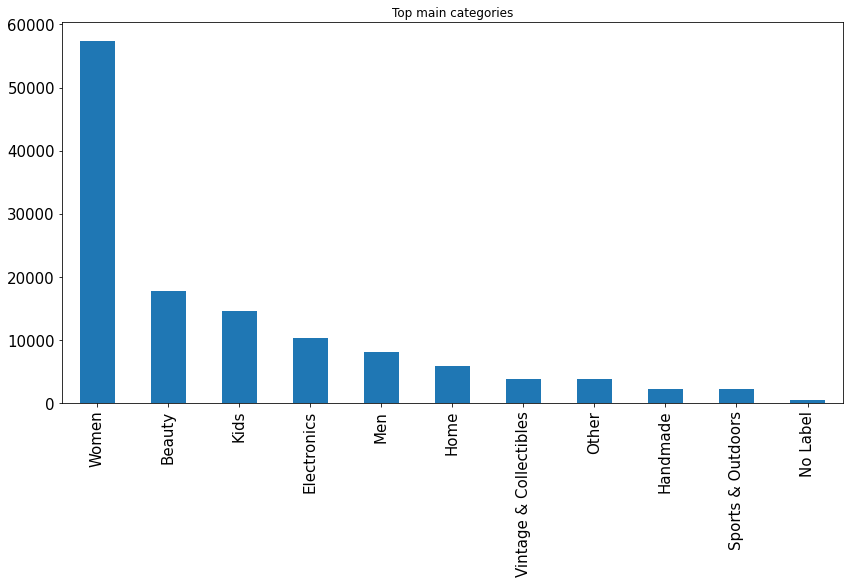

In [18]:
mercari_df['cat_general'].value_counts().plot(kind='bar', figsize=(14,7), title="Top main categories", fontsize=15)

**중분류**

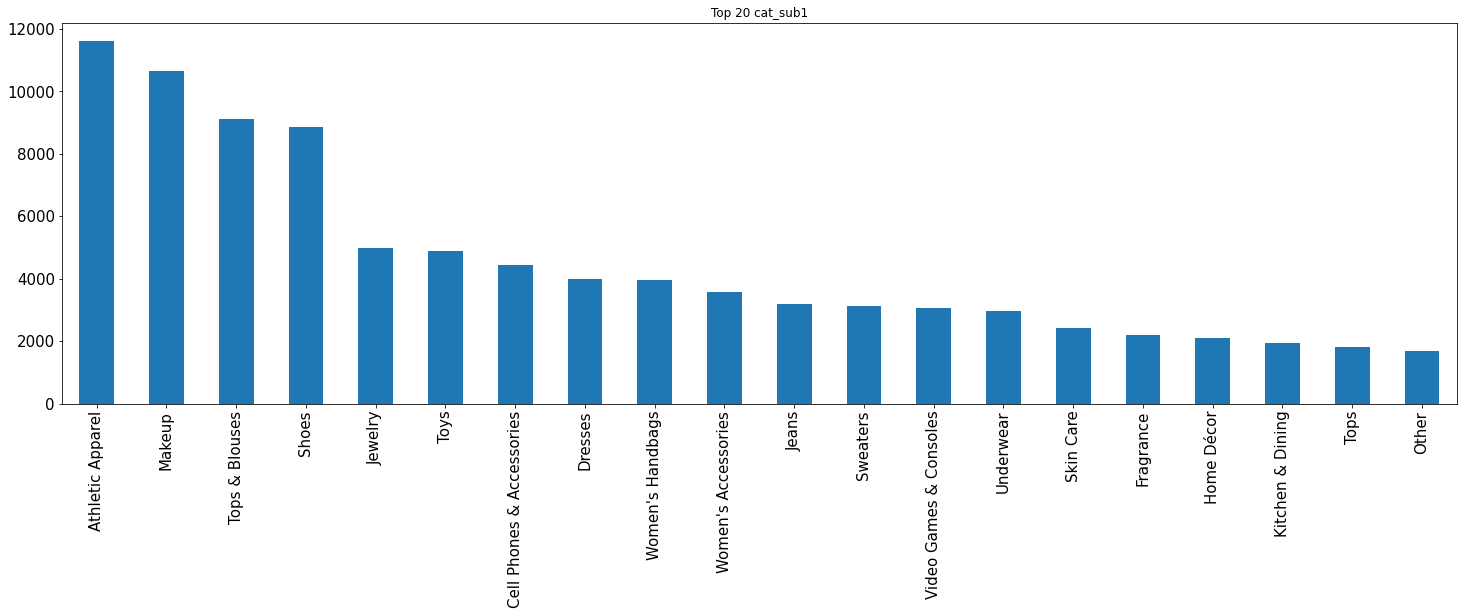

In [19]:
mercari_df['cat_sub1'].value_counts()[:20].plot(kind='bar', figsize=(25,7), title="Top 20 cat_sub1", fontsize=15)

**소분류**

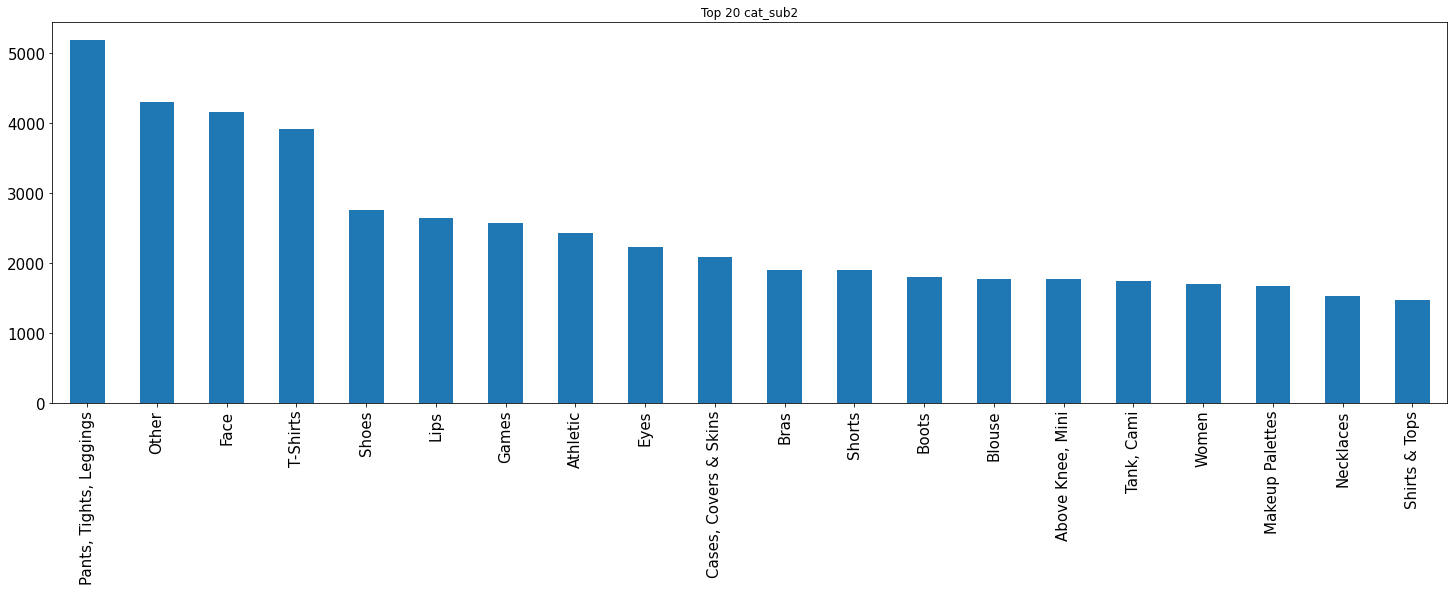

In [20]:
mercari_df['cat_sub2'].value_counts()[:20].plot(kind='bar', figsize=(25,7), title="Top 20 cat_sub2", fontsize=15)

target variable인 price 피처와 item_condition / shipping 간의 상관관계

In [21]:
from scipy.stats import pointbiserialr
pbc_condition = pointbiserialr(mercari_df['item_condition_id'], mercari_df['log_prices'])
pbc_shipping = pointbiserialr(mercari_df['shipping'], mercari_df['log_prices'])
print("item_condition -> log_prices correlation=", pbc_condition[0])
print("shipping -> log_prices correlation=   ", pbc_shipping[0])

item_condition -> log_prices correlation= -0.018966066614108094
shipping -> log_prices correlation=    -0.1956295030077792


### [3] 데이터 전처리

**1) 주어진 데이터프레임에서 train_id 버리기**

In [22]:
mercari_df.drop('train_id', axis=1, inplace=True); mercari_df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_prices,cat_general,cat_sub1,cat_sub2
0,MLB Cincinnati Reds T Shirt Size XL,3.0,Men/Tops/T-shirts,NaN,10.0,1.0,No description yet,2.302585,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3.0,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0.0,This keyboard is in great condition and works ...,3.951244,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1.0,Women/Tops & Blouses/Blouse,Target,10.0,1.0,Adorable top with a hint of lace and a key hol...,2.302585,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1.0,Home/Home Décor/Home Décor Accents,NaN,35.0,1.0,New with tags. Leather horses. Retail for [rm]...,3.555348,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1.0,Women/Jewelry/Necklaces,NaN,44.0,0.0,Complete with certificate of authenticity,3.784190,Women,Jewelry,Necklaces


**2) Price 값의 분포도 확인**

- **로그 변환 이전**

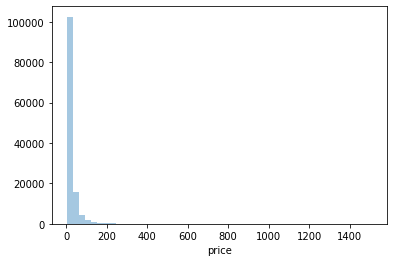

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
sns.distplot(y_train_df,kde=False)

- **로그 변환 이후**

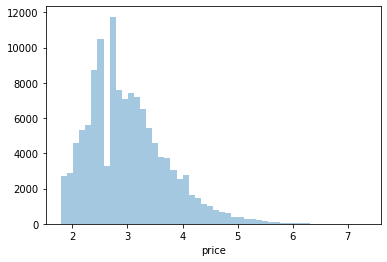

In [24]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df,kde=False)


In [25]:
#로그 변환된 값 확인
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

**3) category_name을 개별 컬럼들로 재생성**

In [26]:
def split(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Null' , 'Null' , 'Null']

In [27]:
cat_general, cat_sub1, cat_sub2 = zip(*mercari_df['category_name'].apply(lambda x : split(x)))
mercari_df["cat_general"] = cat_general
mercari_df["cat_sub1"] = cat_sub1
mercari_df["cat_sub2"] = cat_sub2

In [28]:
#카테고리별 갯수, 유형 확인
print('대분류 갯수 :', mercari_df['cat_sub1'].nunique())
print('대분류 유형 :\n', mercari_df['cat_general'].value_counts())

대분류 갯수 : 112
대분류 유형 :
 Women                     57448
Beauty                    17718
Kids                      14635
Electronics               10353
Men                        8135
Home                       5799
Vintage & Collectibles     3766
Other                      3741
Handmade                   2285
Sports & Outdoors          2140
Null                        506
Name: cat_general, dtype: int64


In [29]:
print('중분류 갯수 :', mercari_df['cat_sub1'].nunique())

중분류 갯수 : 112


In [30]:
print('소분류 갯수 :', mercari_df['cat_sub2'].nunique())

소분류 갯수 : 719


**4) 결측치 처리**

In [31]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Null')

In [32]:
mercari_df.isnull().sum()

name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
log_prices           0
cat_general          0
cat_sub1             0
cat_sub2             0
dtype: int64

In [33]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126526 entries, 0 to 129710
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               126526 non-null  object 
 1   item_condition_id  126526 non-null  float64
 2   category_name      126526 non-null  object 
 3   brand_name         126526 non-null  object 
 4   price              126526 non-null  float64
 5   shipping           126526 non-null  float64
 6   item_description   126526 non-null  object 
 7   log_prices         126526 non-null  float64
 8   cat_general        126526 non-null  object 
 9   cat_sub1           126526 non-null  object 
 10  cat_sub2           126526 non-null  object 
dtypes: float64(4), object(7)
memory usage: 11.6+ MB


In [34]:
'''from wordcloud import WordCloud
from collections import Counter
cat_desc = dict()
for cat in general_cats: 
    text = " ".join(mercari_df.loc[mercari_df['general_cat']==cat, 'item_description'].values)
    cat_desc[cat] = tokenize(text)


# find the most common words for the top 4 categories
women100 = Counter(cat_desc['Women']).most_common(100)
beauty100 = Counter(cat_desc['Beauty']).most_common(100)
kids100 = Counter(cat_desc['Kids']).most_common(100)
electronics100 = Counter(cat_desc['Electronics']).most_common(100)
'''

'from wordcloud import WordCloud\nfrom collections import Counter\ncat_desc = dict()\nfor cat in general_cats: \n    text = " ".join(mercari_df.loc[mercari_df[\'general_cat\']==cat, \'item_description\'].values)\n    cat_desc[cat] = tokenize(text)\n\n\n# find the most common words for the top 4 categories\nwomen100 = Counter(cat_desc[\'Women\']).most_common(100)\nbeauty100 = Counter(cat_desc[\'Beauty\']).most_common(100)\nkids100 = Counter(cat_desc[\'Kids\']).most_common(100)\nelectronics100 = Counter(cat_desc[\'Electronics\']).most_common(100)\n'

### 피처 인코딩과 피처 벡터화

In [35]:
print('brand name 의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 2272
brand name sample 5건 : 
 Null                 53234
PINK                  4813
Nike                  4688
Victoria's Secret     4136
LuLaRoe               2722
Name: brand_name, dtype: int64


In [36]:
print('name 의 종류 갯수 :', mercari_df['name'].nunique())
print('name sample 7건 : \n', mercari_df['name'][:7])

name 의 종류 갯수 : 117985
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


** **굵은 텍스트**item_description의 문자열 개수 확인**

In [37]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 개수
print('item_description 평균 문자열 개수:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 개수: 145.31036308742867


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [38]:
import gc
gc.collect()

252

**name은 Count로, item_description은 TF-IDF로 피처 벡터화**

(10000, 15000)에서 약 4분 소요

In [39]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

# name 속성에 대한 feature vectorization 변환
cnt_vec = CountVectorizer(max_features=10000)
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description 에 대한 feature vectorization 변환 
tfidf_descp = TfidfVectorizer(max_features = 15000, ngram_range= (1,3) , stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shape:',X_descp.shape)


name vectorization shape: (126526, 10000)
item_description vectorization shape: (126526, 15000)


**사이킷런의 LabelBinarizer를 이용하여 원-핫 인코딩 변환 후 희소행렬 최적화 형태로 저장**

In [40]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

lb_cat_general = LabelBinarizer(sparse_output=True)
X_cat_general= lb_cat_general.fit_transform(mercari_df['cat_general'])

lb_cat_sub1 = LabelBinarizer(sparse_output=True)
X_cat_sub1 = lb_cat_sub1.fit_transform(mercari_df['cat_sub1'])

lb_cat_sub2 = LabelBinarizer(sparse_output=True)
X_cat_sub2 = lb_cat_sub2.fit_transform(mercari_df['cat_sub2'])

In [41]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_general shape:{1}'.format(X_shipping.shape, X_cat_general.shape))
print('X_cat_sub1 shape:{0}, X_cat_sub2 shape:{1}'.format(X_cat_sub1.shape, X_cat_sub2.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(126526, 2272), X_item_cond_id shape:(126526, 5)
X_shipping shape:(126526, 1), X_cat_general shape:(126526, 11)
X_cat_sub1 shape:(126526, 112), X_cat_sub2 shape:(126526, 719)


**피처 벡터화된 희소 행렬과 원-핫 인코딩된 희소 행렬을 모두 scipy 패키지의 hstack()함수를 이용하여 결합**

> 들여쓴 블록



In [42]:
from  scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id,
            X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)


X_features_sparse= hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

#del X_features_sparse

gc.collect()


<class 'scipy.sparse.csr.csr_matrix'> (126526, 28120)


150

### 릿지 회귀 모델 구축 및 평가

**rmsle 정의**

In [43]:
def rmsle(y , y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds): 
    
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

**여러 모델에 대한 학습/예측을 수행하기 위해 별도의 함수인 model_train_predict()생성.** 

해당 함수는 여러 희소 행렬을 hstack()으로 결합한 뒤 학습과 테스트 데이터 세트로 분할 후 모델 학습 및 예측을 수행 

In [44]:
import gc 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import Ridge , Lasso, ElasticNet, LinearRegression
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    X= hstack(matrix_list).tocsr()     
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test, model.coef_

#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# 과적합 확인용 함수
def model_train_predict_and_evaluate(model,matrix_list):
    X= hstack(matrix_list).tocsr()     
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    model.fit(X_train , y_train)
    pred1 = model.predict(X_train)
    pred2 = model.predict(X_test)
    train_rmsle = evaluate_org_price(y_train , pred1)
    test_rmsle = evaluate_org_price(y_test , pred2)
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return train_rmsle , test_rmsle, model.coef_
#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

**릿지 선형 회귀로 학습/예측/평가. Item Description 피처의 영향도를 알아보기 위한 테스트 함께 수행**

In [45]:
sparse_matrix_list = (X_descp,X_name, X_brand, X_item_cond_id, X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)

train_rmsle , test_rmsle, coef = model_train_predict_and_evaluate(Ridge() ,sparse_matrix_list)
print('모든 피처 포함 시 train rmsle 값 : ',  train_rmsle)
print('모든 피처 포함 시 test rmsle 값 : ',  test_rmsle, '\n')

sparse_matrix_list = (X_name, X_brand, X_item_cond_id, X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)

train_rmsle , test_rmsle, coef = model_train_predict_and_evaluate(Ridge() ,sparse_matrix_list)
print('X_descp 제외 시 train rmsle 값 : ',  train_rmsle)
print('X_descp 제외 시 test rmsle 값 : ',  test_rmsle, '\n')

sparse_matrix_list = (X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)

train_rmsle , test_rmsle, coef = model_train_predict_and_evaluate(Ridge(),sparse_matrix_list)
print('X_name 제외 시 train rmsle 값 : ',  train_rmsle)
print('X_name 제외 시 test rmsle 값 : ',  test_rmsle, '\n')

sparse_matrix_list = (X_descp,X_name, X_brand, X_cat_general, X_cat_sub1, X_cat_sub2)

train_rmsle , test_rmsle, coef = model_train_predict_and_evaluate(Ridge(),sparse_matrix_list)
print('X_cond_id와 X_shipping 제외 시 train rmsle 값 : ',  train_rmsle)
print('X_cond_id와 X_shipping 제외 시 test rmsle 값 : ',  test_rmsle, '\n')

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id, X_shipping)

train_rmsle , test_rmsle, coef = model_train_predict_and_evaluate(Ridge(),sparse_matrix_list)
print('대/중/소 분류 피처 제외 시 train rmsle 값 : ',  train_rmsle)
print('대/중/소 분류 피처 제외 시 test rmsle 값 : ',  test_rmsle, '\n')

모든 피처 포함 시 train rmsle 값 :  0.39755786393798664
모든 피처 포함 시 test rmsle 값 :  0.4973304446000849 

X_descp 제외 시 train rmsle 값 :  0.4520875940027727
X_descp 제외 시 test rmsle 값 :  0.5125041128654386 

X_name 제외 시 train rmsle 값 :  0.4643929284180886
X_name 제외 시 test rmsle 값 :  0.5238075667976659 

X_cond_id와 X_shipping 제외 시 train rmsle 값 :  0.40557275965959966
X_cond_id와 X_shipping 제외 시 test rmsle 값 :  0.5068882467618785 

대/중/소 분류 피처 제외 시 train rmsle 값 :  0.412226409846328
대/중/소 분류 피처 제외 시 test rmsle 값 :  0.5087348286712731 



릿지

In [46]:

alphas_ridge1= [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)

for a in alphas_ridge1:
  linear_preds , y_test, coef = model_train_predict(model=Ridge(alpha=a) , matrix_list=sparse_matrix_list)
  print(f'alpha값이 {a}일때 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

alpha값이 100000일때 rmsle 값: 0.6907443676657777
alpha값이 10000일때 rmsle 값: 0.642432838862224
alpha값이 1000일때 rmsle 값: 0.5747723801992007
alpha값이 100일때 rmsle 값: 0.5124534224873488
alpha값이 10일때 rmsle 값: 0.4836989828912129
alpha값이 1일때 rmsle 값: 0.4973304446000849
alpha값이 0.1일때 rmsle 값: 0.5300488476355915
alpha값이 0.01일때 rmsle 값: 0.5445690827907703
alpha값이 0.001일때 rmsle 값: 0.5472130436892018
alpha값이 0.0001일때 rmsle 값: 0.5475514238016658


**라쏘 - 중요하지 않은 회귀 계수를 0으로 만드는 특징이 있다. ridge와의 차이점**


In [47]:
alphas_lasso= [0.1, 0.01, 0.008, 0.006]
sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)
coef_double_list = []
for a in alphas_lasso:
    lasso = Lasso(alpha=a)
    linear_preds , y_test, coef = model_train_predict(model=lasso , matrix_list=sparse_matrix_list)
    print("the number of used features: {}".format(np.sum(coef != 0)))
    coef_double_list.append(coef)
    print(f'alpha값이 {a}일때 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

the number of used features: 0
alpha값이 0.1일때 rmsle 값: 0.7095462554661917
the number of used features: 11
alpha값이 0.01일때 rmsle 값: 0.6599291154635869
the number of used features: 12
alpha값이 0.008일때 rmsle 값: 0.6559914986581172
the number of used features: 20
alpha값이 0.006일때 rmsle 값: 0.6503587624441489


In [48]:
coef_double_list[1].max(), coef_double_list[2].max(), coef_double_list[3].max()

(0.3463910691400129, 0.3963388276872331, 0.436482246575805)

In [49]:
alphas_lasso= [0.004, 0.003]
sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)
#coef_double_list = []
for a in alphas_lasso:
    lasso = Lasso(alpha=a)
    linear_preds , y_test, coef = model_train_predict(model=lasso , matrix_list=sparse_matrix_list)
    print("the number of used features: {}".format(np.sum(coef != 0)))
    coef_double_list.append(coef)
    print(f'alpha값이 {a}일때 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

the number of used features: 35
alpha값이 0.004일때 rmsle 값: 0.637945975819889
the number of used features: 47
alpha값이 0.003일때 rmsle 값: 0.6291808697038982


엘라스틱넷

In [50]:
alphas_elasticnet= [0.1, 0.01]
ratios = [0.2, 0.5, 0.8]

for a in alphas_elasticnet:
  for r in ratios:
    linear_preds , y_test, coef = model_train_predict(model=ElasticNet(alpha=a, l1_ratio=r) , matrix_list=sparse_matrix_list)
    print(f'alpha값이 {a}, ratio값이 {r}일때 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

alpha값이 0.1, ratio값이 0.2일때 rmsle 값: 0.6874262515277004
alpha값이 0.1, ratio값이 0.5일때 rmsle 값: 0.6999896552574817
alpha값이 0.1, ratio값이 0.8일때 rmsle 값: 0.7095462554661917
alpha값이 0.01, ratio값이 0.2일때 rmsle 값: 0.6269578877650239
alpha값이 0.01, ratio값이 0.5일때 rmsle 값: 0.6478600899612016
alpha값이 0.01, ratio값이 0.8일때 rmsle 값: 0.6566848913993281


In [51]:
alphas_elasticnet= [0.008, 0.006]
ratios = [0.1, 0.2]

for a in alphas_elasticnet:
  for r in ratios:
    linear_preds , y_test, coef = model_train_predict(model=ElasticNet(alpha=a, l1_ratio=r) , matrix_list=sparse_matrix_list)
    print(f'alpha값이 {a}, ratio값이 {r}일때 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

alpha값이 0.008, ratio값이 0.1일때 rmsle 값: 0.6039431983712269
alpha값이 0.008, ratio값이 0.2일때 rmsle 값: 0.6195154054541573
alpha값이 0.006, ratio값이 0.1일때 rmsle 값: 0.593504272890278
alpha값이 0.006, ratio값이 0.2일때 rmsle 값: 0.6093452453263685


### LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [54]:
def model_train_predict2(model,matrix_list):
    X= hstack(matrix_list).tocsr()     
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test

#ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# 과적합 확인용 함수
def model_train_predict_and_evaluate2(model,matrix_list):
    X= hstack(matrix_list).tocsr()     
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    model.fit(X_train , y_train)
    pred1 = model.predict(X_train)
    pred2 = model.predict(X_test)
    train_rmsle = evaluate_org_price(y_train , pred1)
    test_rmsle = evaluate_org_price(y_test , pred2)
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return train_rmsle , test_rmsle

In [56]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_general, X_cat_sub1, X_cat_sub2)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
gc.collect()
lgbm_preds , y_test = model_train_predict2(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

LightGBM rmsle 값: 0.5152704213904805


In [57]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.5233754625971284


In [58]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)